In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ageinc_df = pd.read_csv('ageinc.csv')
ageinc_df

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53
...,...,...
995,70615,29
996,95102,41
997,42203,35
998,16975,31


In [ ]:
ageinc_df.columns

Index(['income', 'age'], dtype='object')

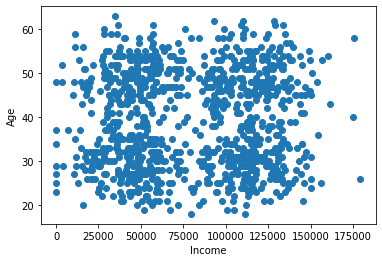

In [ ]:
plt.scatter(ageinc_df['income'],
            ageinc_df['age'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(ageinc_df[['income']])
ageinc_df['income_Z'] = scaler.transform(ageinc_df[['income']])

scaler = StandardScaler().fit(ageinc_df[['age']])
ageinc_df['age_Z'] = scaler.transform(ageinc_df[['age']])

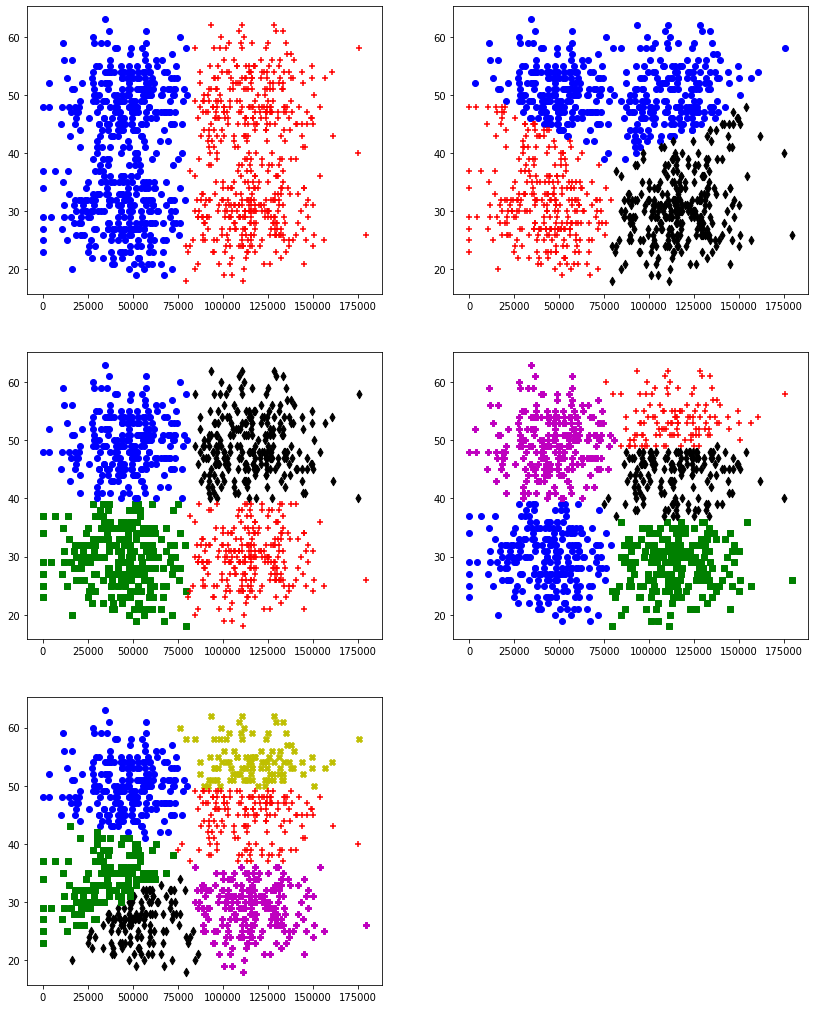

In [ ]:
from sklearn.cluster import KMeans

colors = ['r','b','k','g','m','y']
marks = ['+','o','d','s','P','X']
plt.figure(figsize=(14,18))

for n in range(2,7):
    k_means = KMeans(n_clusters = n,
                    random_state=10)
    ageinc_df['Cluster'] = k_means.fit_predict(ageinc_df[['income_Z','age_Z']])

    plt.subplot(3,2,n-1)
    for c in ageinc_df['Cluster'].unique():
        d = ageinc_df[ageinc_df['Cluster'] == c]
        plt.scatter(d['income'],d['age'], 
                    marker=marks[c],
                    color = colors[c])
plt.show()

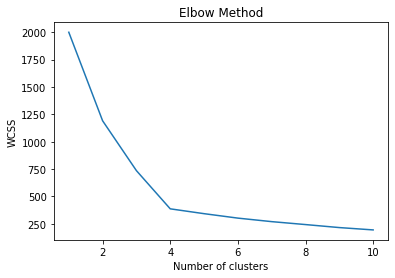

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(ageinc_df[['income_Z','age_Z']].values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>